<h1 style="line-height:50px;;background:#9eb5db;border-radius:15px;height:50px;text-align:center;border:2px ridge;
color:white;">Visualization</h1>

<div style="background:#9eb5db;border-radius:15px;"><h2 style="line-height:50px;height:50px;margin-left:20px;color:white">Requirements
</h2></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="background:#9eb5db;border-radius:15px;"><h2 style="line-height:50px;height:50px;margin-left:20px;color:white">Problem
</h2></div>

In [2]:
df = pd.read_csv("flights.csv")

In [3]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

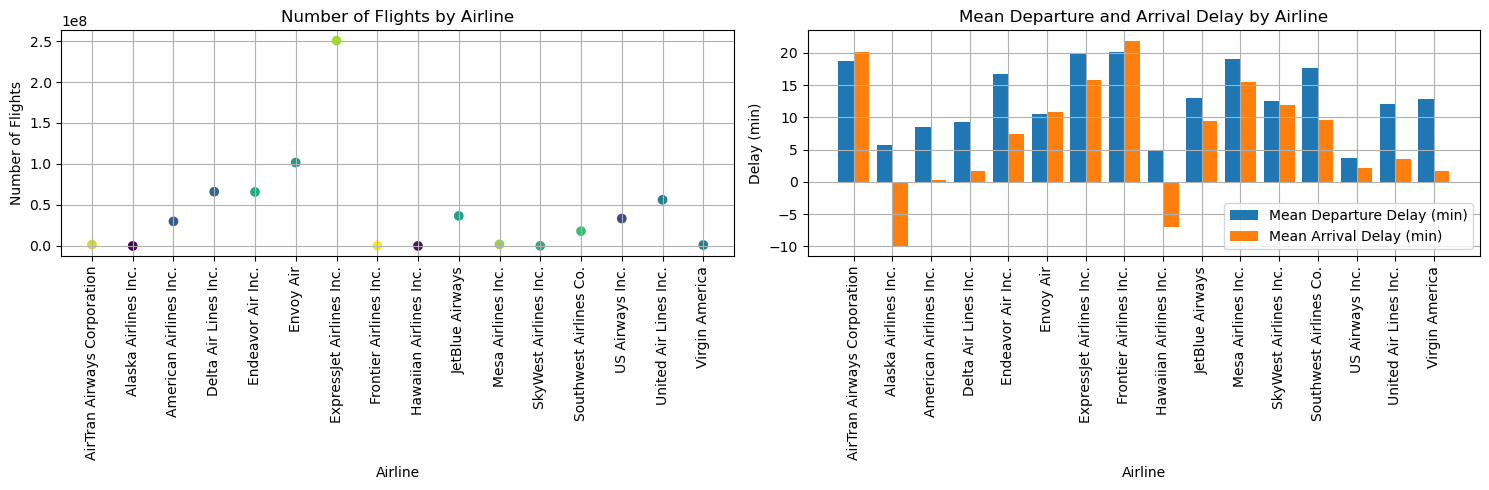

Figure left show number of flight of every airline and it's sum mean of delay and Figure right show delays
for every airline in detail. As can be seen, airlines that have a small number of flights do not necessarily have a low delay,
and the number of flights does not have a linear relationship with the increase in the average delay.


In [5]:
# Group the DataFrame by the 'name' column and calculate the sum of 'flight', and the mean of 'dep_delay' and 'arr_delay' for each group
grouped_df = df.groupby('name').agg({'flight': 'sum', 'dep_delay': 'mean', 'arr_delay': 'mean'})

# Sort the DataFrame by the 'name' column
df = df.sort_values('name')

# Reset the index of the DataFrame to use the 'name' column as a regular column
grouped_df = grouped_df.reset_index()

# Set the figure size and create a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Create a scatter plot showing the number of flights and the sum mean of delay for each airline
axs[0].scatter(x=grouped_df['name'], y=grouped_df['flight'], alpha=1, c=grouped_df['dep_delay'] + grouped_df['arr_delay'])
axs[0].set_xlabel('Airline')
axs[0].set_ylabel('Number of Flights')
axs[0].set_title('Number of Flights by Airline')
axs[0].tick_params(axis='x', labelrotation=90)
axs[0].grid(True)

# Create a bar chart showing the mean departure and arrival delay for each airline
x = np.arange(len(grouped_df.index))
axs[1].bar(x - 0.2, grouped_df['dep_delay'], width=0.4, label='Mean Departure Delay (min)')
axs[1].bar(x + 0.2, grouped_df['arr_delay'], width=0.4, label='Mean Arrival Delay (min)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(grouped_df['name'], rotation=90, ha='center')
axs[1].set_xlabel('Airline')
axs[1].set_ylabel('Delay (min)')
axs[1].set_title('Mean Departure and Arrival Delay by Airline')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('''Figure left show number of flight of every airline and it's sum mean of delay and Figure right show delays
for every airline in detail. As can be seen, airlines that have a small number of flights do not necessarily have a low delay,
and the number of flights does not have a linear relationship with the increase in the average delay.''')

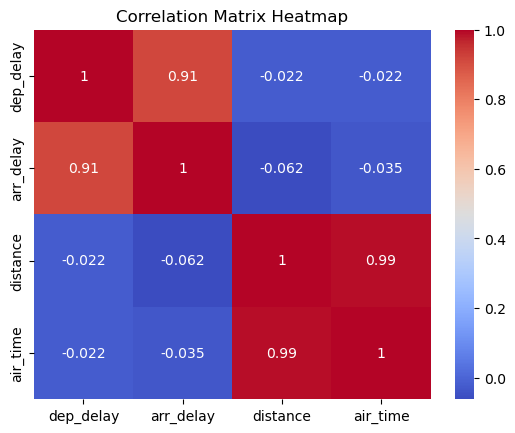

As heatmap of correlation shown dep_delay and arr_dalay have a direct relationship, distance and air_time have a
direct relationship and interestingly, distance and dep_delay or arr_delay are not directly related. 


In [6]:
corr_matrix = df[['dep_delay', 'arr_delay', 'distance', 'air_time']].corr()
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
print('''As heatmap of correlation shown dep_delay and arr_dalay have a direct relationship, distance and air_time have a
direct relationship and interestingly, distance and dep_delay or arr_delay are not directly related. ''')

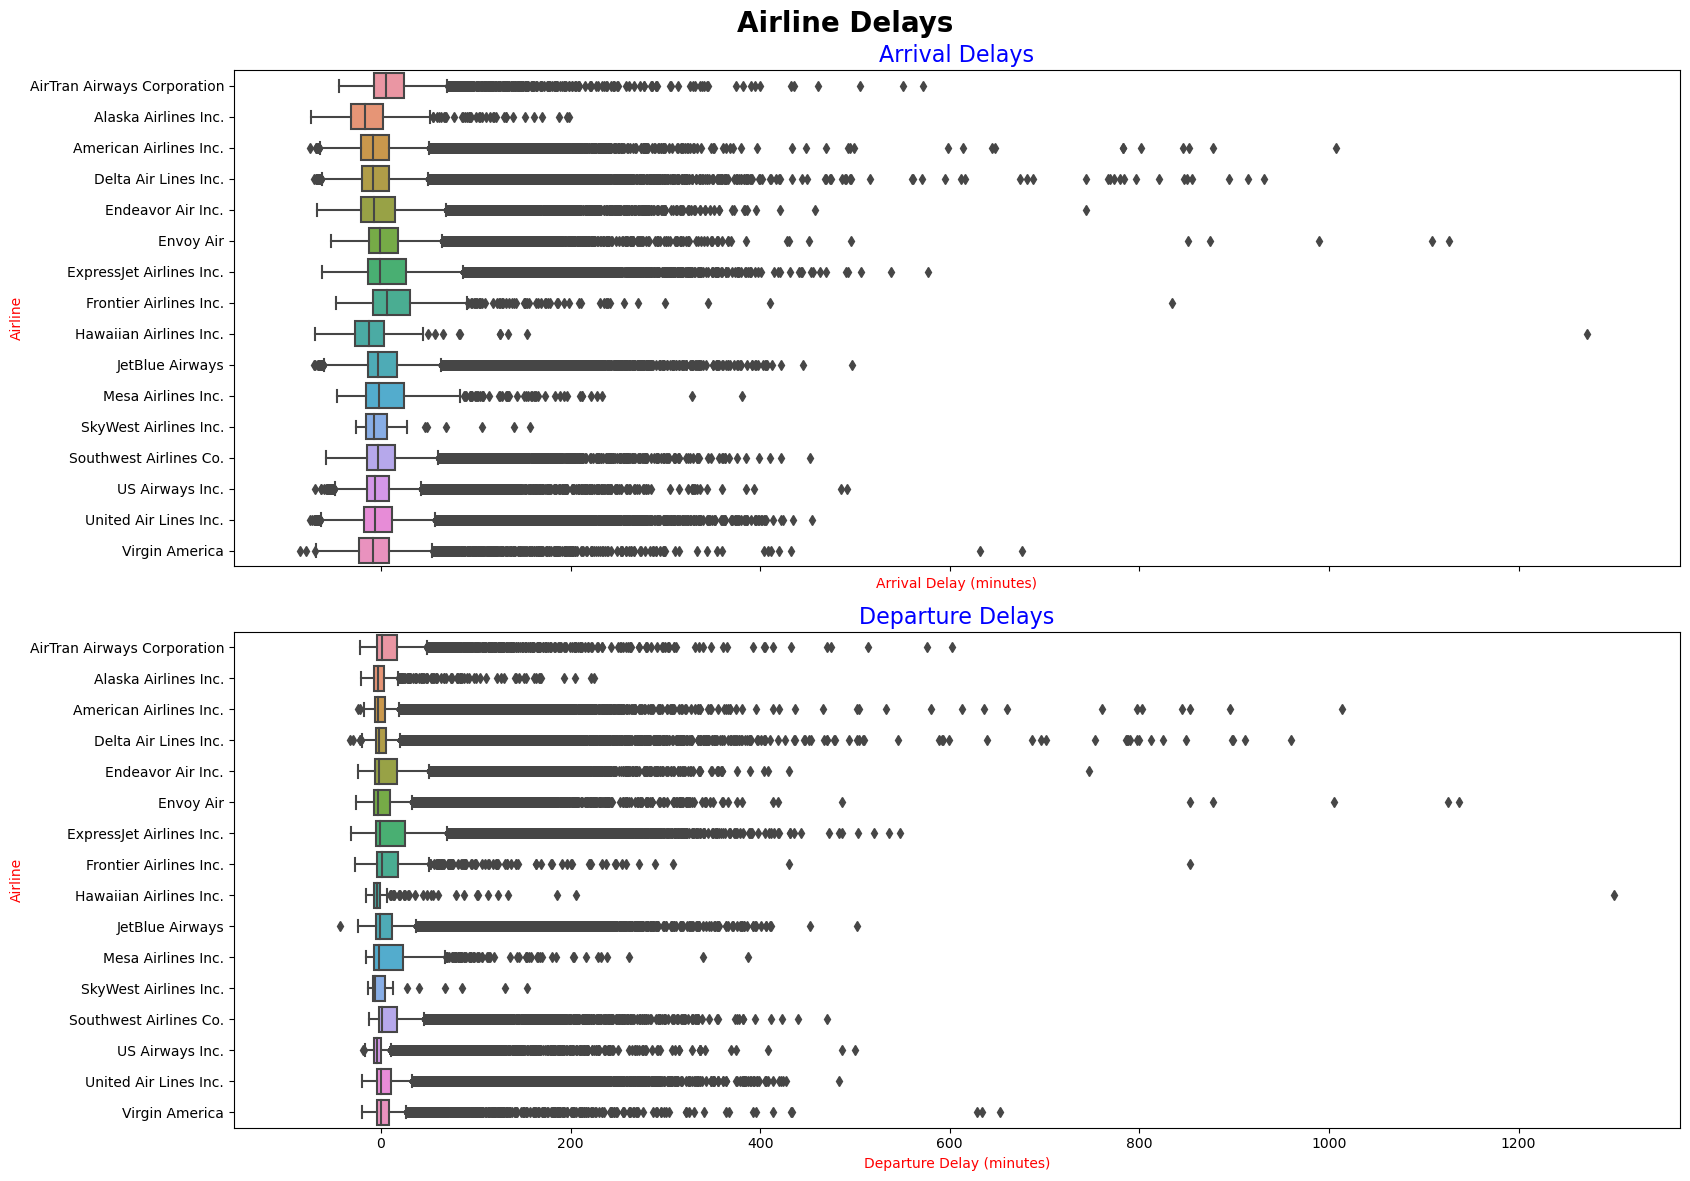


In the two graphs above, the arrival and departure delay data for each airline are displayed in a box format.
First, due to the outliers falling to the right, it can be said that the distribution in both graphs has a negative skewness.
Since the boxes in the arr_delay time are larger than the dep_delay time,
it can be said that the arr_delay data is more scattered than the dep_delay data.



In [7]:
# Create a figure with two subplots stacked vertically and sharing the x-axis
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(17, 12), sharex=True)
# Create a box plot of arrival delay for each airline in the first subplot
sns.boxplot(data=df, x='arr_delay', y='name', ax=axs[0])
axs[0].set_xlabel('Arrival Delay (minutes)', color='r')
axs[0].set_ylabel('Airline', color='r')
axs[0].set_title('Arrival Delays', fontsize=16, color='b')  # Add a title to the first subplot

# Create a box plot of departure delay for each airline in the second subplot
sns.boxplot(data=df, x='dep_delay', y='name', ax=axs[1])
axs[1].set_xlabel('Departure Delay (minutes)', color='r')
axs[1].set_ylabel('Airline', color='r')
axs[1].set_title('Departure Delays', fontsize=16, color='b')  # Add a title to the second subplot


fig.suptitle('Airline Delays', fontsize=20, fontweight='bold')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()
print('''
In the two graphs above, the arrival and departure delay data for each airline are displayed in a box format.
First, due to the outliers falling to the right, it can be said that the distribution in both graphs has a negative skewness.
Since the boxes in the arr_delay time are larger than the dep_delay time,
it can be said that the arr_delay data is more scattered than the dep_delay data.
''')